In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
import numpy.random as random
# packages for SVM support
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
random.seed(10)
print(random.uniform(0, 20, 100))
print(random.randn(10, 2))

[15.42641287  0.41503899 12.6729647  14.97607765  9.97014025  4.49593291
  3.9612573  15.21061424  3.38221673  1.76679628 13.70719637 19.06786692
  0.07896533 10.24384527 16.25241923 12.25052134 14.43510635  5.83752136
 18.35548245 14.29151567 10.85088736  2.84340095  7.4668152  13.4826723
  8.83666349  8.68027987 12.35533957 10.26276485 13.00794364 12.02077907
 16.10446394 10.43294305 18.17297762  6.38472178  1.80918699  6.01400113
  2.27968724 16.57362653  0.93792639 12.52574297 10.95172312 16.38573991
  3.97895079 17.13700605  7.03305279 15.09295383  5.91923414 17.67872959
  6.51023276  3.30031795  7.85058488  1.86920749 16.42211316  3.02304039
  7.68228897 18.88521424 19.7525095   9.12609094 16.52245688  5.02748268
 11.94743296 18.05663521 10.69115898 11.80402726  0.78563534  7.14363517
  1.5922618   6.10919837  6.61438624 15.47660592  0.79918417  8.58984357
  6.29853744 12.72982286  6.926943    0.86194712 17.59830349 15.26481174
 17.56193285  8.35018288 12.11155129 10.26933255 11.

train time = 0.13421964645385742
(3,) (3, 2)
0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
1.0
SVC(C=1, gamma=0.01, kernel='linear')


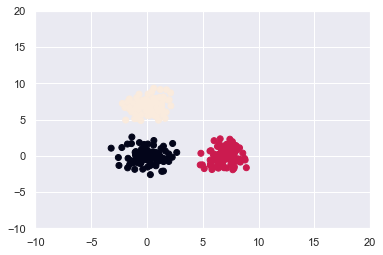

In [3]:
random.seed(2019)
N = 100
SD = 1
X = random.randn(N, 2) * SD + [0, 0]
XX = random.randn(N, 2) * SD + [7, 0]
XXX = random.randn(N, 2) * SD + [0, 7]
X = np.concatenate((X, XX, XXX))
# print(X)

y = [0 ] * N
yy = [1 ] * N
yyy = [2 ] * N
y = np.append(y, yy)
y = np.append(y, yyy) # setting color
# print(y)

xmin=-10; xmax=20
ymin=-10; ymax=20
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1], c= y);

model = svm.SVC(C = 1, gamma=0.01, kernel='linear')
time_start = time.time()
model.fit(X, y)
print('train time =', time.time()-time_start)
# print(model.decision_function_shape)
print(model.intercept_.shape, model.coef_.shape)

pred = model.predict(X)
result= pred-y
print (result.sum())
print(pred)
print(model.score(X, y))
print(model)

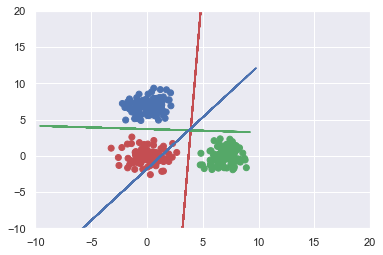

In [4]:
xmin=-10; xmax=20
ymin=-10; ymax=20
mycolor = {0:'r', 1:'g', 2: 'b'}
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
Xcolor = [ mycolor[i] for i in y]
plt.scatter(X[:,0], X[:,1], c = Xcolor)

for i in range(3):
    GX = random.uniform(-10, 10, 100)
    GY = -1.0 * model.coef_[i, 0] * GX / model.coef_[i, 1] - model.intercept_[i]/ model.coef_[i, 1]
    plt.plot(GX,GY, c=mycolor[i])

In [5]:
print(model.coef_)
print(model.intercept_)
model

[[-0.9212915   0.04976951]
 [-0.03900897 -0.86414695]
 [ 0.3051623  -0.21440438]]
[ 3.43871675  3.19065632 -0.38766743]


SVC(C=1, gamma=0.01, kernel='linear')

train time = 0.002991914749145508
0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
1.0
SVC(C=1000, gamma=0.1, kernel='linear', probability=True)


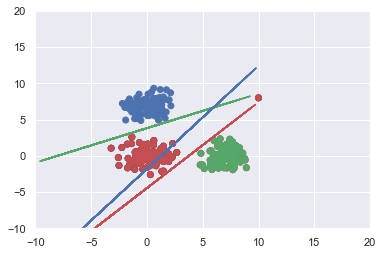

In [6]:
random.seed(2019)
N = 100
SD = 1
X = random.randn(N-1, 2) * SD + [0, 0]
XX = random.randn(N, 2) * SD + [7, 0]
XXX = random.randn(N, 2) * SD + [0, 7]
add = [[10, 8]]
# print(X, XX, XXX)
X = np.concatenate((X, add))
X = np.concatenate((X, XX, XXX))

y = [0] * N
yy = [1 ] * N
yyy = [2 ] * N
y = np.append(y, yy)
y = np.append(y, yyy)

xmin=-10; xmax=20
ymin=-10; ymax=20
plt.xlim(xmin, xmax)
plt.scatter(X[:,0], X[:,1], c=y);

model = svm.SVC(C = 1000, gamma=0.1, kernel='linear', probability=True)
time_start = time.time()
model.fit(X, y)
print('train time =', time.time()-time_start)

pred = model.predict(X)
result= pred-y
print (result.sum())
print(pred)
print(model.score(X, y))
print(model)

xmin=-10; xmax=20
ymin=-10; ymax=20
mycolor = {0:'r', 1:'g', 2: 'b'}
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
Xcolor = [ mycolor[i] for i in y]
plt.scatter(X[:,0], X[:,1], c = Xcolor)

for i in range(3):
    GX = random.uniform(-10, 10, 100)
    GY = -1.0 * model.coef_[i, 0] * GX / model.coef_[i, 1] - model.intercept_[i]/ model.coef_[i, 1]
    plt.plot(GX,GY, c=mycolor[i])

In [7]:
def graph(Cvalue, IsLinear):
    mycolor = {0:'r', 1:'g', 2: 'b', 3:'c', 4: 'y', 5: 'k'}
    
    if IsLinear == False: return

    plt.figure(figsize=(4, 4))
    xmin=-10; xmax=20
    ymin=-10; ymax=20
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    Xcolor = [ mycolor[i] for i in y]
    plt.scatter(X[:,0], X[:,1], c = Xcolor)

    for i in range(6):
        GX = random.uniform(-10, 10, 100)
        GY = -1.0 * model.coef_[i, 0] * GX / model.coef_[i, 1] - model.intercept_[i]/ model.coef_[i, 1]
        plt.plot(GX,GY, c=mycolor[i])
    plt.title('Cvalue = ' + str(Cvalue))
    plt.show()
    return

Cvalue =  0.01 train time = 0.0009984970092773438
(6,) (6, 2)
8


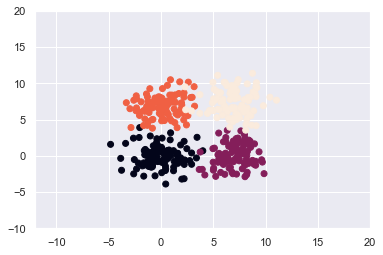

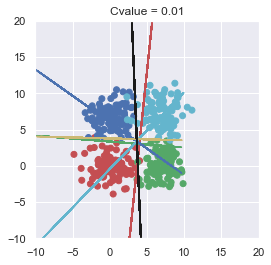

Cvalue =  0.1 train time = 0.0009984970092773438
(6,) (6, 2)
7


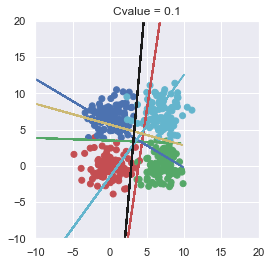

Cvalue =  1 train time = 0.0009982585906982422
(6,) (6, 2)
11


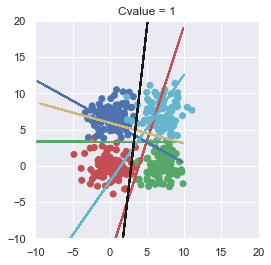

Cvalue =  10 train time = 0.001994609832763672
(6,) (6, 2)
8


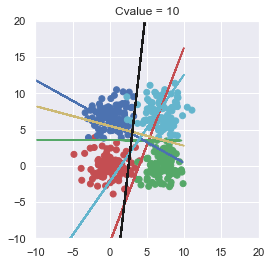

Cvalue =  100 train time = 0.002992868423461914
(6,) (6, 2)
6


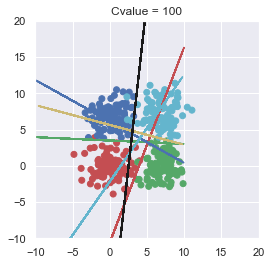

Cvalue =  1000 train time = 0.006981372833251953
(6,) (6, 2)
6


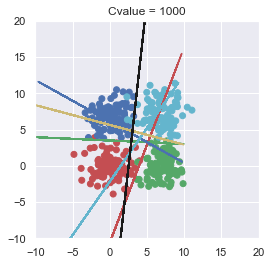

Cvalue =  10000 train time = 0.15467047691345215
(6,) (6, 2)
6


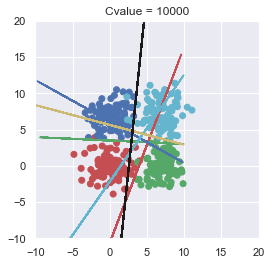

Cvalue =  100000 train time = 0.3614692687988281
(6,) (6, 2)
6


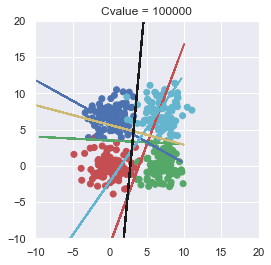

In [8]:
random.seed(2019)
N = 100
SD = 1.5
X = random.randn(N, 2) * SD + [0, 0]
XX = random.randn(N, 2) * SD + [7, 0]
XXX = random.randn(N, 2) * SD + [0, 7]
XXXX = random.randn(N, 2) * SD + [7, 7]
X = np.concatenate((X, XX, XXX, XXXX))

y = [0] * N
yy = [1 ] * N
yyy = [2 ] * N
yyyy = [3 ] * N
y = np.append(y, yy)
y = np.append(y, yyy)
y = np.append(y, yyyy)

xmin=-12; xmax=20
ymin=-10; ymax=20
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1], c=y);

results = []
for Cvalue in (0.01, 0.1, 1, 10, 100, 1000, 10000, 100000):
    IsLinear = True
    model = svm.SVC(C = Cvalue, gamma=0.1, kernel='linear', decision_function_shape='ovo')
    time_start = time.time()
    model.fit(X, y)
    print('Cvalue = ', Cvalue, 'train time =', time.time()-time_start)
    print(model.intercept_.shape, model.coef_.shape)

    pred = model.predict(X)
    result= abs(pred-y)
    
    print (result.sum())
    
    results = results + \
    [[Cvalue, result.sum(), time.time()-time_start]]
    
    graph(Cvalue, IsLinear)

In [9]:
# print(results)
resultsDF = pd.DataFrame(results, columns=['C', 'Nerrors', 'TrainTime'])
resultsDF

,C,Nerrors,TrainTime
0,0.01,8,0.003988
1,0.10,7,0.002993
2,1.00,11,0.001997
3,10.00,8,0.002992
4,100.00,6,0.003990
5,1000.00,6,0.007978
6,10000.00,6,0.155620
7,100000.00,6,0.362467


In [10]:
model

SVC(C=100000, decision_function_shape='ovo', gamma=0.1, kernel='linear')